In [92]:
# Assignment 8

# Clustring Analysis

In [93]:
import pandas as pd

df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [94]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [95]:
df = df.drop('ID#',axis=1)

In [96]:
num_cols = list(df.drop('Award?',axis=1))

num_cols

['Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll']

In [97]:
# outliers handling

for col in num_cols:
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [98]:
# EDA
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,2370.0,43142.116456,40690.784373,68.0,13874.25,29189.0,60245.0,202636.0
Qual_miles,2370.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
cc1_miles,2370.0,1.746414,1.081834,1.0,1.00,1.0,3.0,5.0
cc2_miles,2370.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
cc3_miles,2370.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Bonus_miles,2370.0,9564.230802,12228.170566,0.0,375.00,3675.5,15154.5,50752.0
Bonus_trans,2370.0,8.751899,7.402842,0.0,1.00,9.0,14.0,33.0
Flight_miles_12mo,2370.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Flight_trans_12,2370.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Days_since_enroll,2370.0,3891.261181,2062.465495,8.0,2112.75,3775.5,5545.0,8296.0


<Axes: >

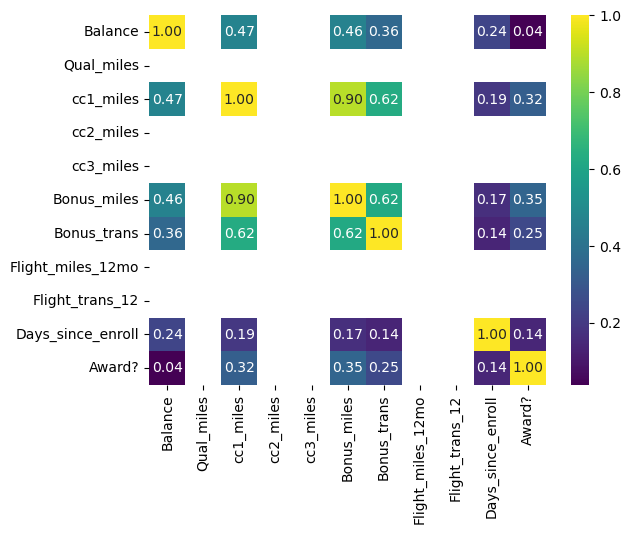

In [99]:
# Checking for multicollinearity

import seaborn as sns

sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt=".2f")

In [100]:
# dropping highly correlated feature

df.drop('cc1_miles',axis=1,inplace=True)

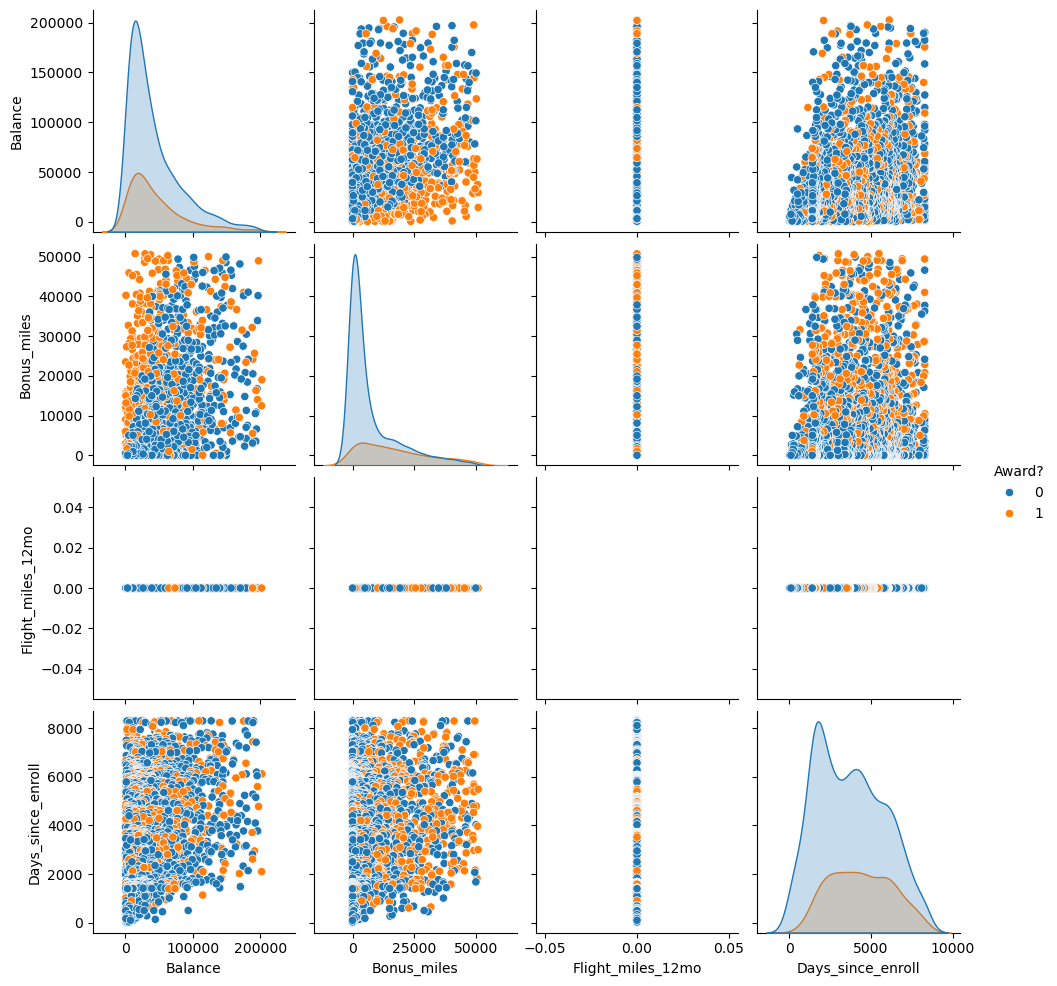

In [101]:
key_feats = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']

sns.pairplot(df,vars = key_feats,hue='Award?')

In [102]:
# preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

kf_df = scaler.fit_transform(df[key_feats])

In [103]:
# K-means clustering

# finding optimal k-value

from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=38, n_init=10)
    kmeans.fit(kf_df)
    wcss.append(kmeans.inertia_)

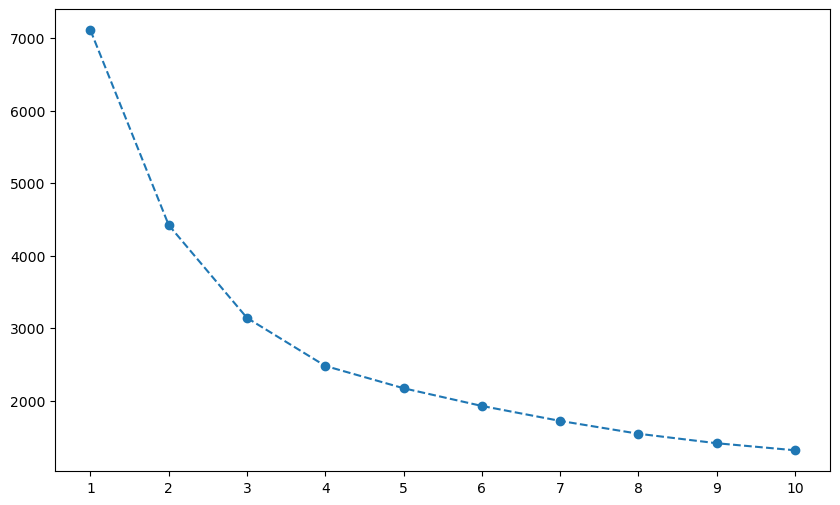

In [104]:
# Elbow curve

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, 'o--')
plt.xticks(range(1, 11))
plt.show()

In [105]:
# optimal k-value = 4 

k = 4

model = KMeans(n_clusters=k, init='k-means++', random_state=38, n_init=10)
df['cluster_label'] = model.fit_predict(kf_df)

In [106]:
# getting centroids
centroids_scaled = kmeans.cluster_centers_

centroids_scaled

array([[ 0.45543669,  2.43158709,  0.        ,  0.50970924],
       [ 0.40932155, -0.39630635,  0.        , -0.48482919],
       [-0.15545591,  0.84560112,  0.        ,  0.89297307],
       [ 2.56022507,  0.11903206,  0.        ,  0.00847362],
       [-0.6086003 , -0.58879659,  0.        ,  0.12909385],
       [-0.69959494, -0.60304625,  0.        , -1.15140253],
       [ 1.34737   ,  0.16813694,  0.        ,  1.1229975 ],
       [-0.44213281, -0.59045655,  0.        ,  1.31910336],
       [ 2.48484152,  2.15338004,  0.        ,  0.69480007],
       [ 0.20158689,  1.0752548 ,  0.        , -0.7560039 ]])

In [107]:
centroids_original = scaler.inverse_transform(centroids_scaled)

centroids_original

array([[ 61670.2826087 ,  39291.81884058,      0.        ,
          4942.29710145],
       [ 59794.21721311,   4719.15163934,      0.        ,
          2891.52868852],
       [ 36817.82802548,  19902.20382166,      0.        ,
          5732.59872611],
       [147297.70212766,  11019.46808511,      0.        ,
          3908.73404255],
       [ 18382.91780822,   2365.84474886,      0.        ,
          4157.456621  ],
       [ 14681.05585586,   2191.63423423,      0.        ,
          1517.03423423],
       [ 97956.09090909,  11619.8041958 ,      0.        ,
          6206.91608392],
       [ 25155.18153846,   2345.55076923,      0.        ,
          6611.29230769],
       [144230.93333333,  35890.57333333,      0.        ,
          5323.96      ],
       [ 51343.11442786,  22709.85572139,      0.        ,
          2332.35820896]])

In [108]:
from sklearn.metrics import silhouette_score

score = silhouette_score(kf_df, df['cluster_label'])
print(f"\nSilhouette Score: {score:.3f}")


Silhouette Score: 0.376


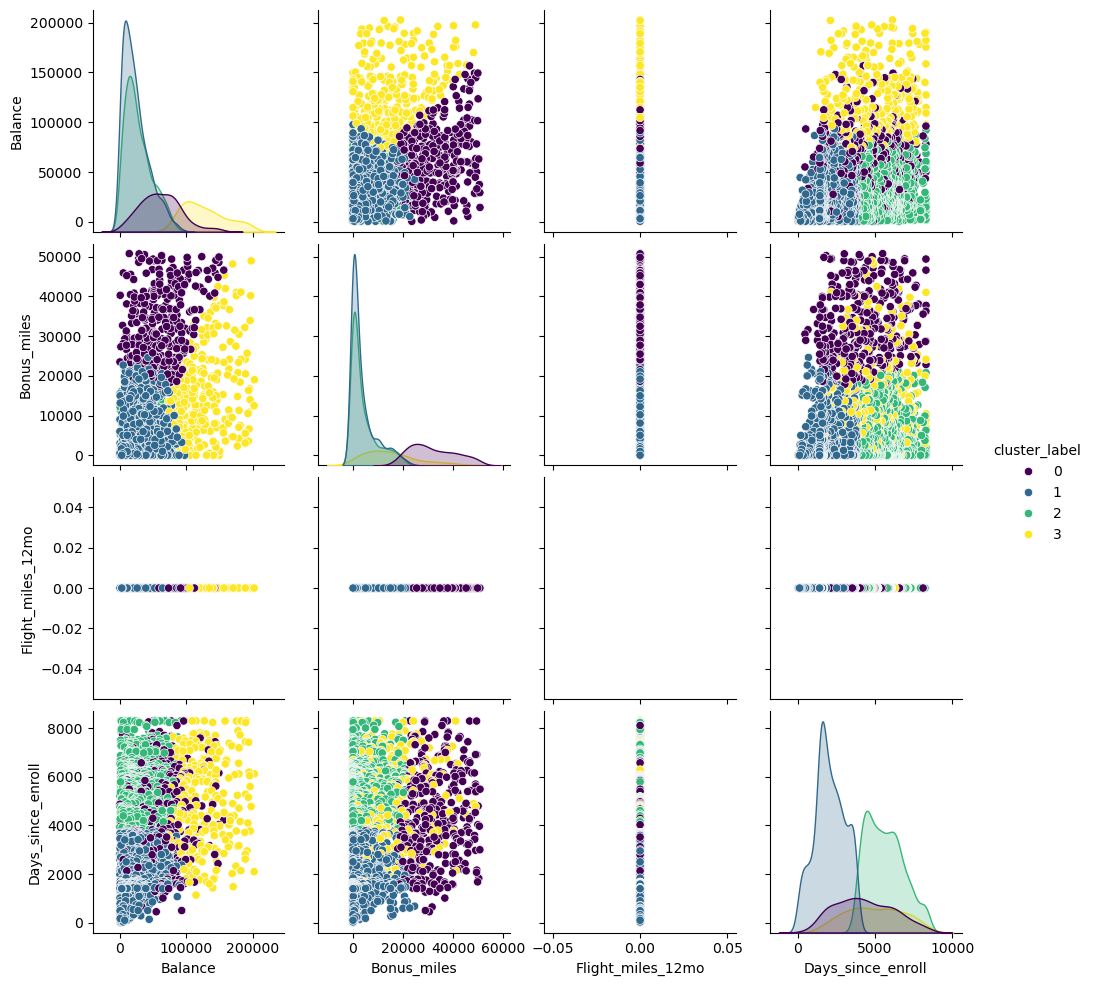

In [109]:
sns.pairplot(df, vars=key_feats, hue='cluster_label', palette='viridis')
plt.show()

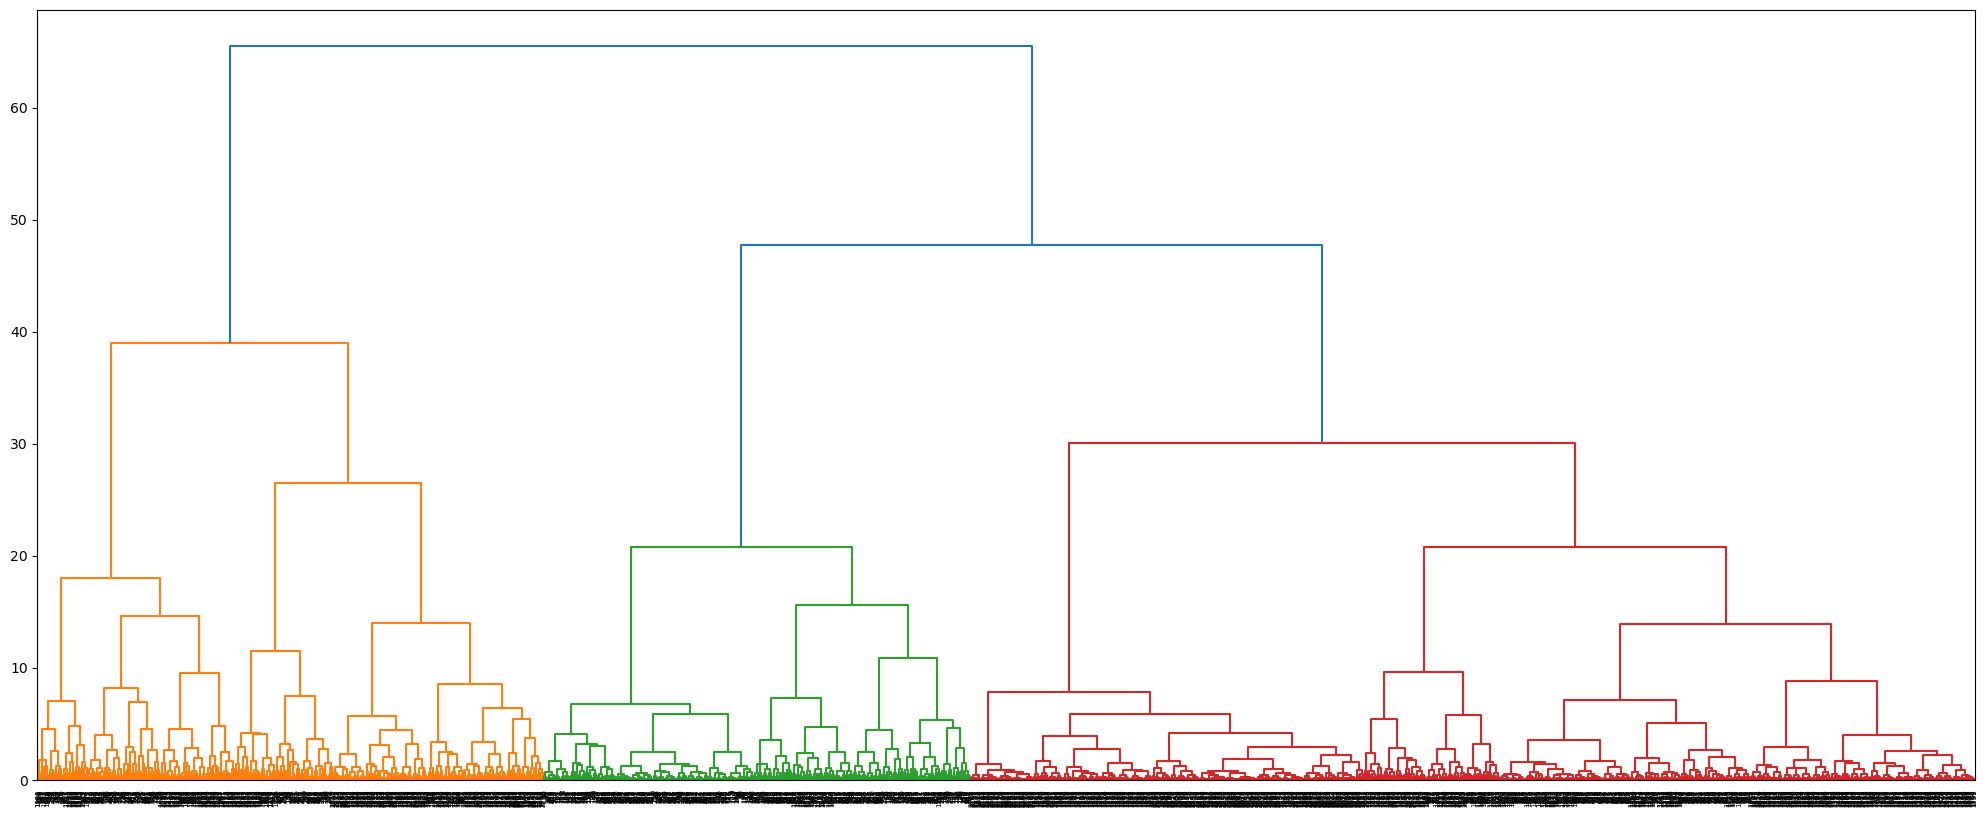

In [110]:
# Hierarchical clustring

from scipy.cluster.hierarchy import linkage,dendrogram

plt.figure(figsize=(25, 10))
dendrogram(linkage(kf_df, method='ward'))
plt.show()

silhouette_score: 0.3117


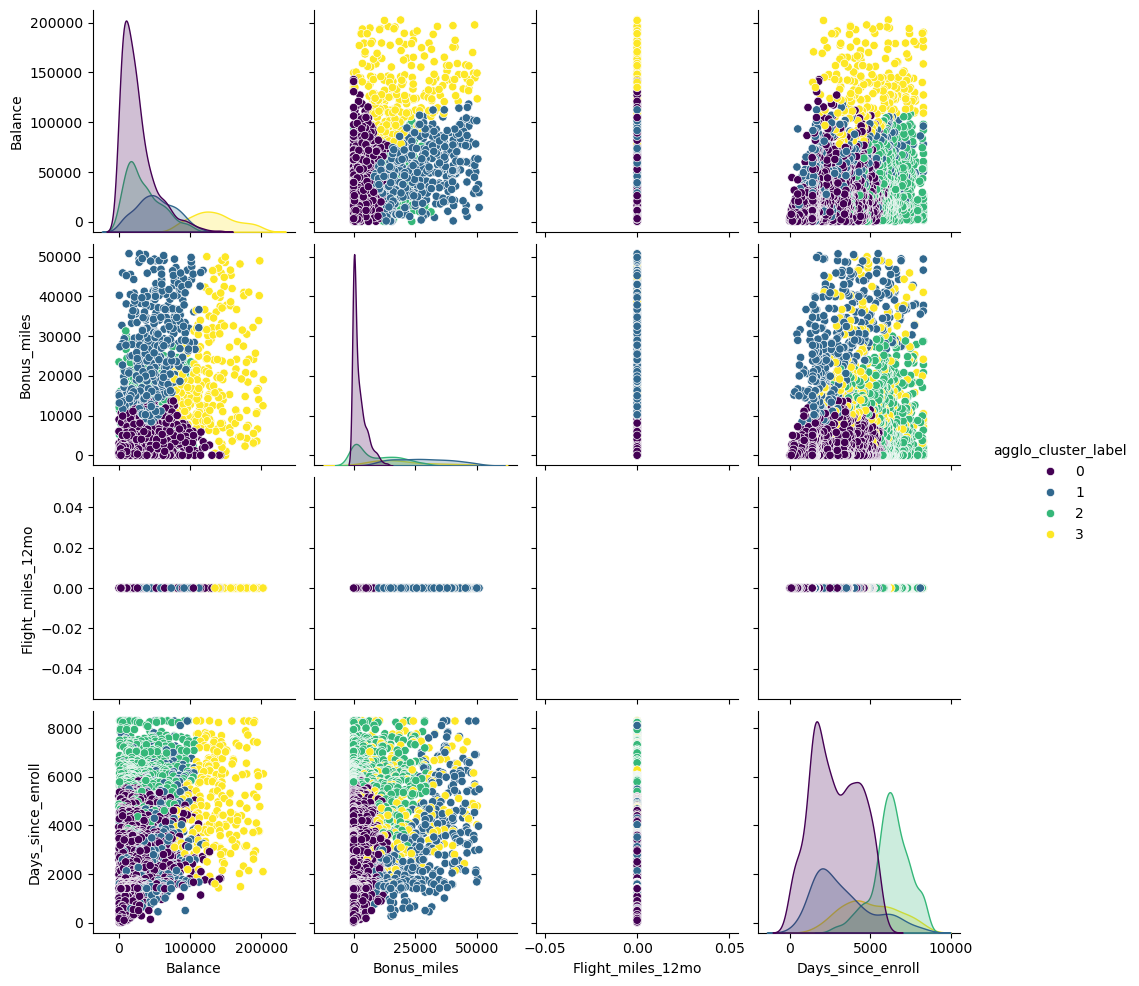

In [111]:
# agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

k = 4 # from dendrogram

agglo_model = AgglomerativeClustering(n_clusters= k, linkage='ward')
df['agglo_cluster_label'] = agglo_model.fit_predict(kf_df)


score = silhouette_score(kf_df, df['agglo_cluster_label'])
print(f"silhouette_score: {score:.4f}")

sns.pairplot(df, vars=key_feats, hue='agglo_cluster_label', palette='viridis')
plt.show()

In [123]:
# DBSCAN

from sklearn.cluster import DBSCAN

eps = np.arange(0.1, 1.0, 0.05)   
minpts = range(6, 11)               

results = []

for i in minpts:
    for j in eps:
        model = DBSCAN(eps=j, min_samples=i)
        labels = model.fit_predict(kf_df)

        unique_labels = set(labels) - {-1}

        if len(unique_labels) > 1:  
            score = silhouette_score(kf_df, labels)
        else:
            score = -1   

        results.append((j, i, score))

In [127]:
results_df = pd.DataFrame(results, columns=["eps", "min_samples", "silhouette_score"])
results_df.sort_values(by="silhouette_score", ascending=False).head(1)

,eps,min_samples,silhouette_score
67,0.75,9,0.441847


In [125]:
best_model = DBSCAN(eps=0.75, min_samples=9)
df['dbscan_cluster_labels'] = best_model.fit_predict(kf_df)

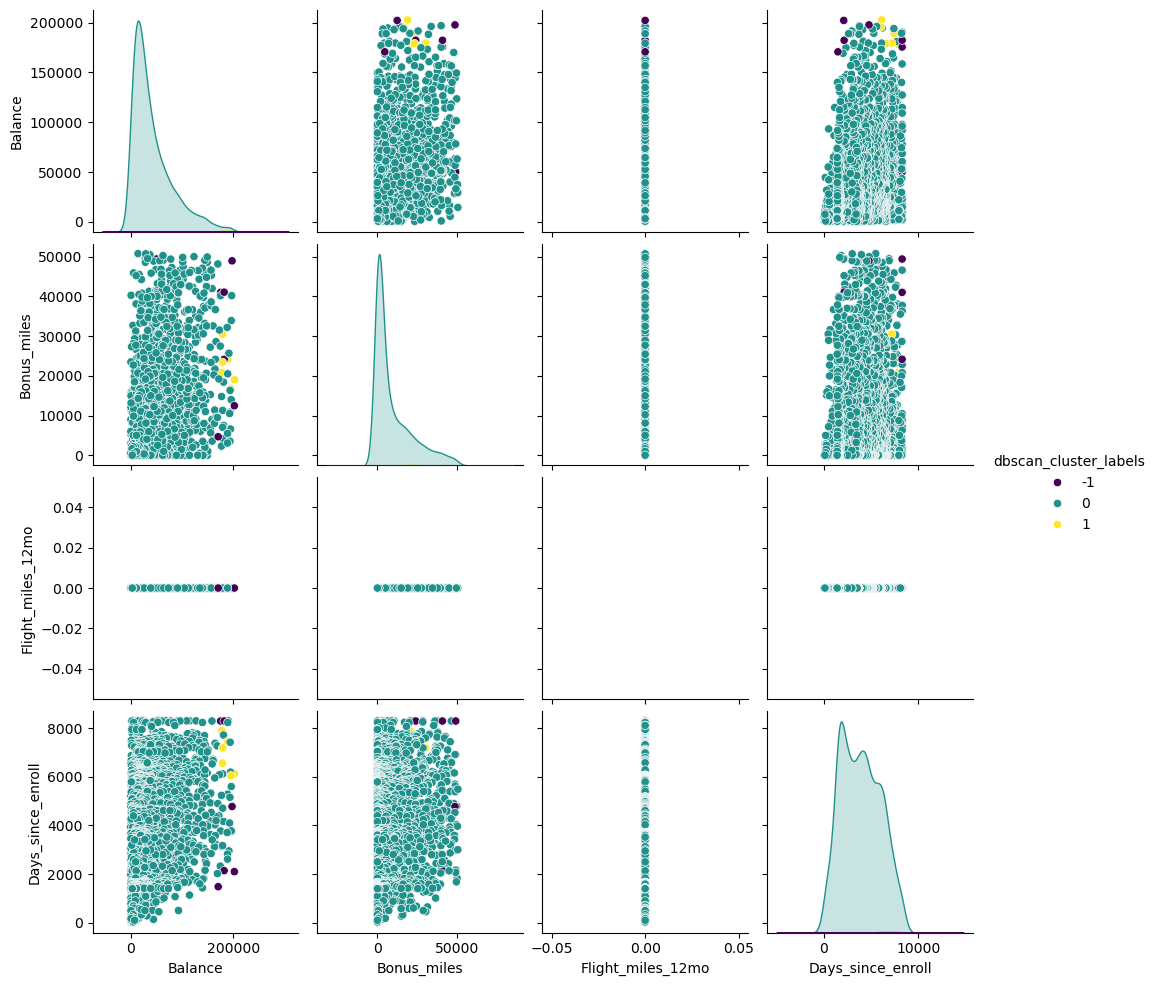

In [126]:
sns.pairplot(df, vars=key_feats, hue='dbscan_cluster_labels', palette='viridis')
plt.show()